### Hoja de trabajo 9
### Sebastian Garcia 22291
### Jose Morales 22689

In [135]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
from scipy.stats import linregress
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import *
import sklearn.metrics as metrics
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SequentialFeatureSelector 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV,Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from joblib import dump, load
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


from scipy.stats import chi2_contingency
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Leer datos de un csv #

In [136]:
archivo1_csv = "train.csv"
datost = pd.read_csv(archivo1_csv, encoding='ISO-8859-1')

# - Analisis Exploratorio #

# Resumen del set de datos #

In [137]:
datost.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [138]:
datost.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [139]:
datost.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Descripción de Columnas #

1. **Id**: Id con el que está identificada la casa. <br>
2. **MSSubClass**: Tipo de construcción de la propiedad (subclase). <br>
3. **MSZoning**: Zona de uso de la propiedad (residencial, comercial, etc.). <br>
4. **LotFrontage**: Longitud en pies de trozo de calle conectado a la propiedad. <br>
5. **LotArea**: Tamaño del lote en pies cuadrados. <br>
6. **Street**: Tipo de calle donde se encuentra la propiedad. <br>
7. **Alley**: Acceso a la propiedad desde una calle secundaria o callejón. <br>
8. **LotShape**: Forma general de la propiedad. <br>
9. **LandContour**: Planicidad de la propiedad (si es plana, en pendiente, etc.). <br>
10. **Utilities**: Tipo de utilidades disponibles para la propiedad (agua, electricidad, gas, etc.). <br>
11. **LotConfig**: Configuración del lote (si es esquina, interior, etc.). <br>
12. **LandSlope**: Pendiente del terreno (suave, moderado o empinado). <br>
13. **Neighborhood**: Localización de la propiedad en relación con las vecindades cercanas. <br>
14. **Condition1**: Proximidad a una calle principal o carretera. <br>
15. **Condition2**: Proximidad a una segunda calle o carretera si aplica. <br>
16. **BldgType**: Tipo de construcción de la vivienda (casa independiente, adosada, etc.). <br>
17. **HouseStyle**: Estilo arquitectónico de la vivienda. <br>
18. **OverallQual**: Calidad general de los materiales y productos terminados en la construcción. <br>
19. **OverallCond**: Calificación general de la condición del lugar (nuevo, bien mantenido, deteriorado, etc.). <br>
20. **YearBuilt**: Año de construcción de la casa. <br>
21. **YearRemodAdd**: Año en el que se hizo alguna remodelación significativa de la casa. <br>
22. **RoofStyle**: Tipo de techo de la propiedad. <br>
23. **RoofMatl**: Material utilizado en el techo de la vivienda. <br>
24. **Exterior1st**: Primer tipo de revestimiento exterior de la casa. <br>
25. **Exterior2nd**: Segundo tipo de revestimiento exterior si aplica. <br>
26. **MasVnrType**: Tipo de revestimiento de mampostería (piedra, ladrillo, etc.). <br>
27. **MasVnrArea**: Área del revestimiento de mampostería en pies cuadrados. <br>
28. **ExterQual**: Calidad del material exterior de la propiedad. <br>
29. **ExterCond**: Condición del material exterior de la propiedad. <br>
30. **Foundation**: Tipo de cimientos de la casa (ladrillo, hormigón, etc.). <br>
31. **BsmtQual**: Calidad del sótano (si es completo, tiene alta, media o baja calidad). <br>
32. **BsmtCond**: Condición general del sótano. <br>
33. **BsmtExposure**: Si las paredes del sótano están expuestas o a nivel de jardín o salida. <br>
34. **BsmtFinType1**: Calidad del área terminada del sótano. <br>
35. **BsmtFinSF1**: Pies cuadrados del área terminada del sótano. <br>
36. **BsmtFinType2**: Calidad de la segunda área terminada del sótano, si aplica. <br>
37. **BsmtFinSF2**: Pies cuadrados del área terminada de la segunda zona del sótano. <br>
38. **BsmtUnfSF**: Pies cuadrados del sótano sin terminar. <br>
39. **TotalBsmtSF**: Pies cuadrados totales del sótano. <br>
40. **Heating**: Tipo de calefacción de la casa. <br>
41. **HeatingQC**: Calidad y condición del sistema de calefacción. <br>
42. **CentralAir**: Si la propiedad cuenta con aire acondicionado central. <br>
43. **Electrical**: Tipo de sistema eléctrico de la vivienda. <br>
44. **1stFlrSF**: Pies cuadrados del primer piso de la casa. <br>
45. **2ndFlrSF**: Pies cuadrados del segundo piso de la casa. <br>
46. **LowQualFinSF**: Pies cuadrados con acabados de baja calidad en todos los pisos. <br>
47. **GrLivArea**: Pies cuadrados de superficie habitable sobre el nivel del suelo. <br>
48. **BsmtFullBath**: Número de baños completos en el sótano. <br>
49. **BsmtHalfBath**: Número de baños a medio terminar en el sótano. <br>
50. **FullBath**: Número de baños completos fuera del sótano. <br>
51. **HalfBath**: Número de baños a medio terminar fuera del sótano. <br>
52. **BedroomAbvGr**: Número de dormitorios fuera del sótano. <br>
53. **KitchenAbvGr**: Número de cocinas fuera del sótano. <br>
54. **KitchenQual**: Calidad de la cocina. <br>
55. **TotRmsAbvGrd**: Número total de habitaciones fuera del sótano. <br>
56. **Functional**: Calificación de la funcionalidad de la casa (por ejemplo, si la distribución es adecuada). <br>
57. **Fireplaces**: Número de chimeneas en la propiedad. <br>
58. **FireplaceQu**: Calidad de las chimeneas. <br>
59. **GarageType**: Ubicación del garaje (integrado, separado, etc.). <br>
60. **GarageYrBlt**: Año en el que fue construido el garaje. <br>
61. **GarageFinish**: Acabado interior del garaje. <br>
62. **GarageCars**: Número de coches que el garaje puede albergar. <br>
63. **GarageArea**: Tamaño del garaje en pies cuadrados. <br>
64. **GarageQual**: Calidad del garaje. <br>
65. **GarageCond**: Condición del garaje. <br>
66. **PavedDrive**: Si la propiedad tiene un camino pavimentado. <br>
67. **WoodDeckSF**: Área cubierta de madera en pies cuadrados. <br>
68. **OpenPorchSF**: Área del porche abierto en pies cuadrados. <br>
69. **EnclosedPorch**: Área cerrada del porche en pies cuadrados. <br>
70. **3SsnPorch**: Área del porche de tres estaciones. <br>
71. **ScreenPorch**: Área del porche con malla o red en pies cuadrados. <br>
72. **PoolArea**: Área de la piscina en pies cuadrados. <br>
73. **PoolQC**: Calidad de la piscina. <br>
74. **Fence**: Calidad de la cerca de la propiedad. <br>
75. **MiscFeature**: Características no cubiertas en otras categorías (por ejemplo, ascensor, terraza, etc.). <br>
76. **MiscVal**: Valor de las características adicionales no cubiertas en otras categorías. <br>
77. **MoSold**: Mes en el que se vendió la propiedad. <br>
78. **YrSold**: Año en el que se vendió la propiedad. <br>
79. **SaleType**: Tipo de venta de la propiedad (por ejemplo, venta normal, subasta, etc.). <br>
80. **SaleCondition**: Condición de la venta (por ejemplo, si fue una venta de remate o en condiciones especiales). <br>
81. **SalePrice**: Precio de venta de la casa. <br>


In [140]:
datost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [141]:
datost.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [142]:
datost.duplicated().sum()

np.int64(0)

# Obtenemos las columnas con datos Numericos #

In [143]:
# Obtener los nombres de las columnas numericas
columnas_numericas = datost.select_dtypes(include=['number']).columns.tolist()
columnas_numericas.remove('Id')

# Obtener los nombres de las columnas no numéricas
columnas_no_numericas = datost.select_dtypes(exclude=['number']).columns.tolist()
print("Columnas numéricas:")
print(columnas_numericas)

print("\nColumnas no numéricas:")
print(columnas_no_numericas)


numericast = datost[columnas_numericas]
#numericasp = datosp[columnas_numericas]



Columnas numéricas:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Columnas no numéricas:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu

# Obtenemos las columnas numericas con datos faltantes #

In [144]:
def count_empty_values_per_column(df):
    total_rows = len(df)
    missing_values = df.isna().sum()
    missing_values = missing_values[missing_values > 0]  # Filtrar solo columnas con valores faltantes
    
    if missing_values.empty:
        print("No hay valores faltantes en el DataFrame.")
    else:
        missing_percentage = (missing_values / total_rows) * 100
        missing_info = pd.DataFrame({
            'Valores Faltantes': missing_values,
            'Proporción (%)': missing_percentage
        })
        print("Número de valores faltantes por columna y su proporción respecto al total de filas:")
        print(missing_info)

#Columnas del df de train con filas vacias
count_empty_values_per_column(numericast)

Número de valores faltantes por columna y su proporción respecto al total de filas:
             Valores Faltantes  Proporción (%)
LotFrontage                259       17.739726
MasVnrArea                   8        0.547945
GarageYrBlt                 81        5.547945


Las variables que parecen podrian describir mejor el modelo son las variables GrLivArea y OverallQual por lo que se generaran modelos lineales con dichas variables

In [145]:
# Seleccionar las variables clave
columnas_numericas = ['SalePrice','MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd'
                      , 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                      'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
                      , 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt'
                      , 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
                      , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

datos_numericos = datost[columnas_numericas]  # Crear nuevo dataframe con las variables seleccionadas

# Mostrar las primeras filas para verificar
datos_numericos.head()



,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,208500,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,181500,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,223500,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,140000,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,250000,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [146]:
columnas_no_numericas = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


letras = datost[columnas_no_numericas]
letras.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Vemos valores nulos o repetidos que tiene nuestro conjunto de datos y los sustituimos por la mediana.

In [147]:
print("Valores nulos por columna:")
print(datos_numericos.isnull().sum())

# Verificar valores duplicados
print("\nNúmero de filas duplicadas:")
print(datos_numericos.duplicated().sum())




Valores nulos por columna:
SalePrice          0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

Número de filas duplicadas:
0


# Sustituimos los valores numericos por la mediana #

In [148]:
# Reemplazar valores nulos con la mediana de cada columna
# Para columnas numéricas, sustituimos los valores nulos por la mediana

datost.fillna({'LotFrontage' : datost['LotFrontage'].median()}, inplace=True)
datost.fillna({'GarageYrBlt' : datost['GarageYrBlt'].median()}, inplace=True)
#datost['GarageYrBlt'].fillna(datost['GarageYrBlt'].median(), inplace=True)
# Verificar nuevamente los valores nulos después de reemplazarlos
print("\nValores nulos después de reemplazar con la mediana:")
print(datos_numericos.isnull().sum())


Valores nulos después de reemplazar con la mediana:
SalePrice          0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64


In [149]:
print("Valores nulos por columna en datos categóricos:")
print(letras.isnull().sum())




Valores nulos por columna en datos categóricos:
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype:

# Sustituimos los valores nulos por la moda #

In [150]:
datost.fillna({'Alley': datost['Alley'].mode()[0]}, inplace=True)
datost.fillna({'MasVnrType': datost['MasVnrType'].mode()[0]}, inplace=True)
datost.fillna({'BsmtQual': datost['BsmtQual'].mode()[0]}, inplace=True)
datost.fillna({'BsmtCond': datost['BsmtCond'].mode()[0]}, inplace=True)
datost.fillna({'BsmtExposure': datost['BsmtExposure'].mode()[0]}, inplace=True)
datost.fillna({'BsmtFinType1': datost['BsmtFinType1'].mode()[0]}, inplace=True)
datost.fillna({'BsmtFinType2': datost['BsmtFinType2'].mode()[0]}, inplace=True)
datost.fillna({'FireplaceQu': datost['FireplaceQu'].mode()[0]}, inplace=True)
datost.fillna({'GarageType': datost['GarageType'].mode()[0]}, inplace=True)
datost.fillna({'GarageFinish': datost['GarageFinish'].mode()[0]}, inplace=True)
datost.fillna({'GarageQual': datost['GarageQual'].mode()[0]}, inplace=True)
datost.fillna({'GarageCond': datost['GarageCond'].mode()[0]}, inplace=True)
datost.fillna({'PoolQC': datost['PoolQC'].mode()[0]}, inplace=True)
datost.fillna({'Fence': datost['Fence'].mode()[0]}, inplace=True)
datost.fillna({'MiscFeature': datost['MiscFeature'].mode()[0]}, inplace=True)



# Verificar nuevamente los valores nulos
print("\nValores nulos después de reemplazar con la moda:")
print(datost.isnull().sum())


Valores nulos después de reemplazar con la moda:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


# Verificamos si nuestro dataset sigue con valores nulos #

In [151]:
datost.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

<p> Se puede observar que ya no cuenta con valores nulos, procedemos a trabajar con el dataset para el analisis </p>

# Preprocesamiento del dataset <br>
# Matriz de correlación #

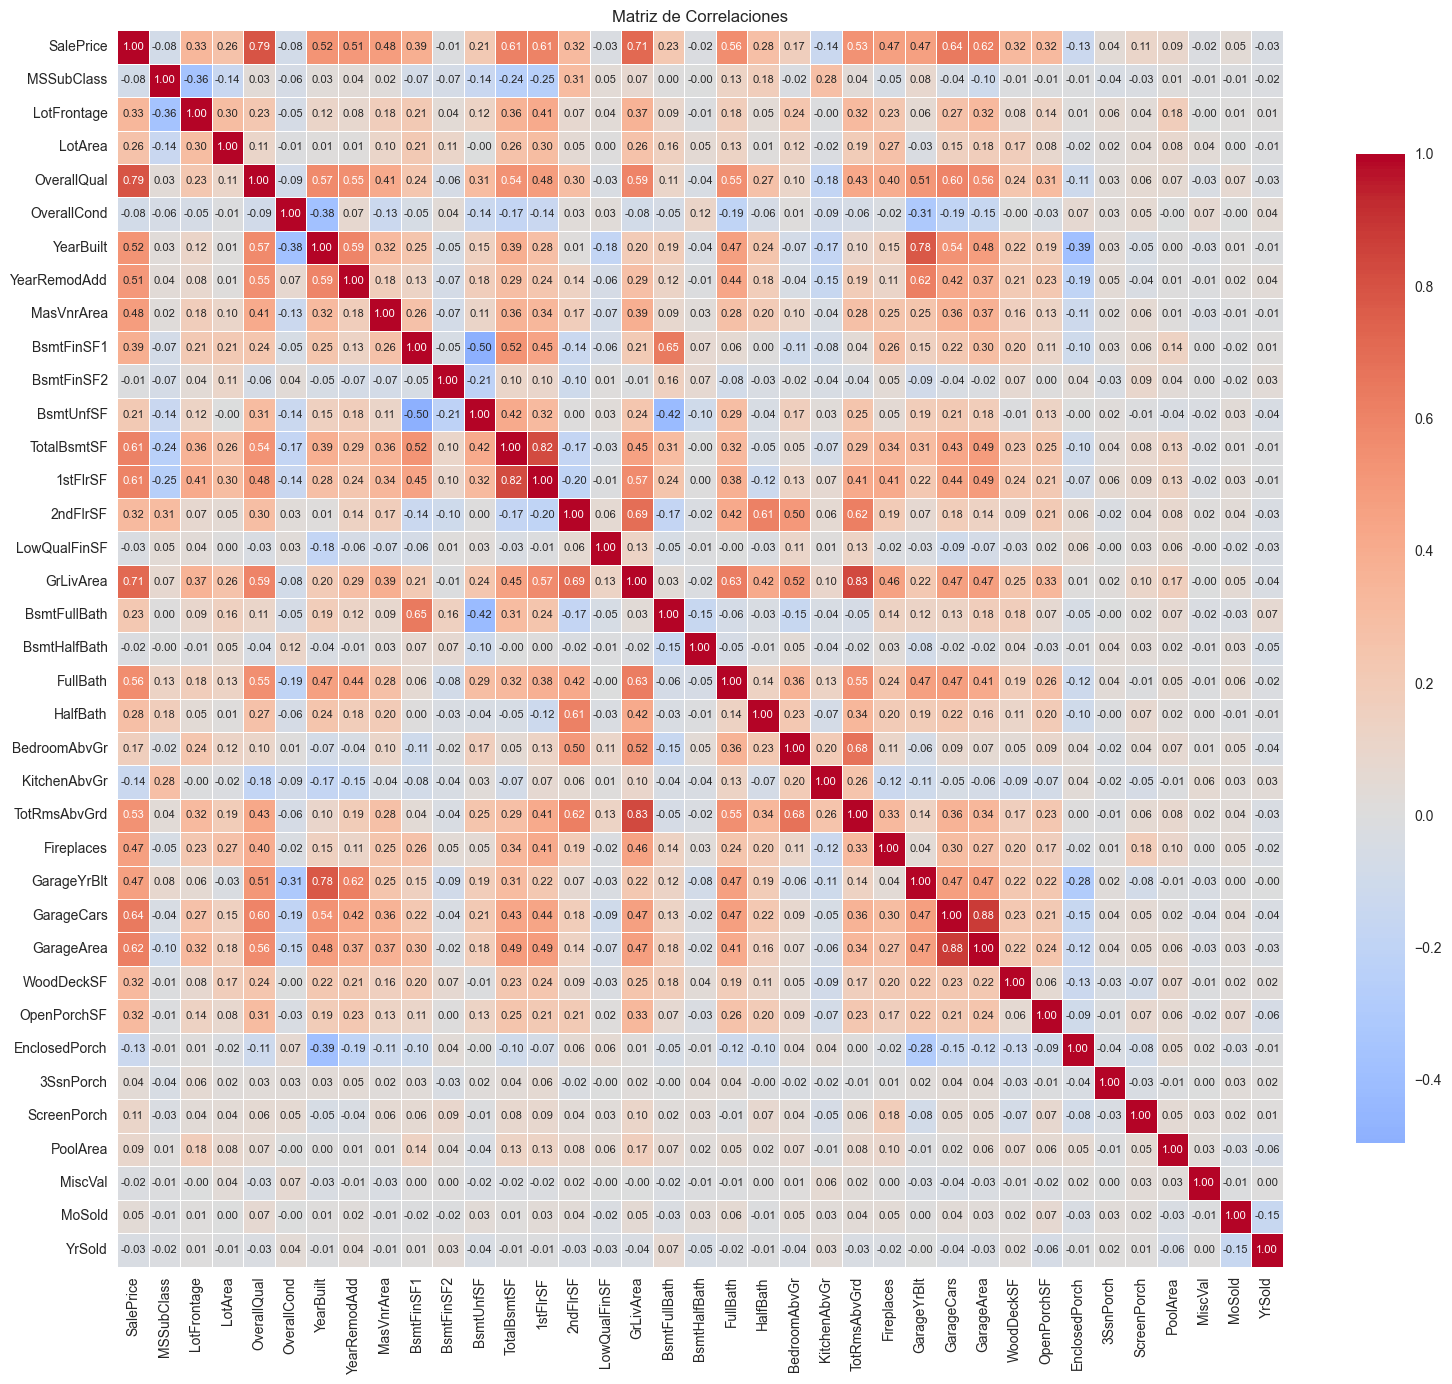

In [152]:

# Calcular matriz de correlaciones
corr_matrix = datost[columnas_numericas].corr()

plt.figure(figsize=(16, 14))

# Crear el heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            cbar_kws={'shrink': 0.8},  # Reducir el tamaño de la barra de color
            annot_kws={'size': 8},  # Reducir el tamaño de la fuente de los números
            linewidths=0.5)


plt.xticks(rotation=90)  # Rota las etiquetas del eje X
plt.yticks(rotation=0)   # Rota las etiquetas del eje Y (si es necesario)


plt.title('Matriz de Correlaciones')
plt.tight_layout()
plt.show()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(datos_numericos)
X_scaled = pd.DataFrame(X_scaled, columns=datos_numericos.columns)

<p>Observando la matriz de correlacíon podemos ver que hay varias columnas que no tienen una buena correlación con la variable SalePrice, la cual es la que nos interesa evaluar para los futuros modelos, por lo tanto solamente trabajaremos con: </p>

SalePrice,OverallQual ,GrLivArea,GarageCars


<p> Se puede observar que las columnas que vamos a utilizar no tienen valores nulos, por lo tanto no hay que corregir el dataframe. </p>

In [153]:
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

numeric_columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']

# Filtrando el DataFrame para obtener solo las columnas que te interesan
columns_to_select = categorical_columns + numeric_columns
datost = datost[columns_to_select]

In [154]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datost[numeric_columns] = scaler.fit_transform(datost[numeric_columns])

In [155]:
# Verificar que ambas tablas tienen la misma cantidad de filas
print("\nFilas en datos numéricos:", len(datos_numericos))
print("Filas en datos categóricos:", len(letras))

#columnas_usar = ["SalePrice","OverallQual" ,"GrLivArea","GarageCars"]


# Unir ambos datasets
datos_limpiados = datost.copy()
datos_limpiados2 = datos_limpiados.copy()

# Mostrar el resultado final
print("\nDatos combinados después de la limpieza:")
datos_limpiados.head()



Filas en datos numéricos: 1460
Filas en datos categóricos: 1460

Datos combinados después de la limpieza:


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,OverallQual,GrLivArea,GarageCars
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Y,Gd,MnPrv,Shed,WD,Normal,0.347273,0.651479,0.370333,0.311725
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Y,Gd,MnPrv,Shed,WD,Normal,0.007288,-0.071836,-0.482512,0.311725
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Y,Gd,MnPrv,Shed,WD,Normal,0.536154,0.651479,0.515013,0.311725
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Y,Gd,MnPrv,Shed,WD,Abnorml,-0.515281,0.651479,0.383659,1.650307
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Y,Gd,MnPrv,Shed,WD,Normal,0.869843,1.374795,1.299326,1.650307


# Analisis para observar que variables categoricas son las mejores para el modelo #

In [156]:
from sklearn.feature_selection import f_classif

# Aplica ANOVA a cada variable categórica
anova_scores = []
for col in categorical_columns:
    X_cat = datos_limpiados[col].astype('category').cat.codes.values.reshape(-1, 1)
    f_score, _ = f_classif(X_cat, datos_limpiados['SalePrice'])
    anova_scores.append(f_score[0])

for col, score in zip(categorical_columns, anova_scores):
    print(f"{col}: {score}")

MSZoning: 1.7427925033233271
Street: 1.8707163691968878
Alley: 1.0829665591311617
LotShape: 1.4040637070125206
LandContour: 1.0793229273003802
Utilities: 0.23979596482992555
LotConfig: 0.9605177757733244
LandSlope: 1.1951228349694856
Neighborhood: 1.2504812992396086
Condition1: 0.7777434917901039
Condition2: 1.53690833279312
BldgType: 1.023017198116637
HouseStyle: 1.0396859243806844
RoofStyle: 1.1735913279300674
RoofMatl: 1.0687849226292692
Exterior1st: 0.9812420008434056
Exterior2nd: 1.0138333008684413
MasVnrType: 1.9702413882048169
ExterQual: 3.7748828876663105
ExterCond: 0.869631122792361
Foundation: 1.4988459189847005
BsmtQual: 3.0119378419272
BsmtCond: 0.9979438597722142
BsmtExposure: 1.3802654589121763
BsmtFinType1: 0.9808357448129525
BsmtFinType2: 0.8564053810613717
Heating: 1.4797213891452388
HeatingQC: 1.2876555108870527
CentralAir: 1.5722758791235756
Electrical: 1.1286839937138475
KitchenQual: 2.9047453946078408
Functional: 0.8039921226528484
FireplaceQu: 1.1879001573578267
G

In [157]:
categoricas_utilziar= [
    "ExterQual",
    "BsmtQual",
    "KitchenQual",
    "GarageFinish",
    "MasVnrType",
    "MSZoning",
    "Street",
    "Condition2",
    "CentralAir"
]

datos_limpiados = datos_limpiados[categoricas_utilziar + numeric_columns]

datos_limpiados.dtypes

ExterQual        object
BsmtQual         object
KitchenQual      object
GarageFinish     object
MasVnrType       object
MSZoning         object
Street           object
Condition2       object
CentralAir       object
SalePrice       float64
OverallQual     float64
GrLivArea       float64
GarageCars      float64
dtype: object

In [158]:
datos_limpiados3 = datos_limpiados.copy()

In [159]:
datos_limpiados3.describe()

,SalePrice,OverallQual,GrLivArea,GarageCars
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,1.362685e-16,1.387018e-16,-1.277517e-16,1.216683e-16
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-1.838704e+00,-3.688413e+00,-2.249120e+00,-2.365440e+00
25%,-6.415162e-01,-7.951515e-01,-7.347485e-01,-1.026858e+00
50%,-2.256643e-01,-7.183611e-02,-9.797004e-02,3.117246e-01
75%,4.165294e-01,6.514792e-01,4.974036e-01,3.117246e-01
max,7.228819e+00,2.821425e+00,7.855574e+00,2.988889e+00


<P> Se puede observar que los datos tienen la mayoria valores muy similares, por lo tanto no hay que hacer modificaciones para el modelo. </p>

# Creacion de la variable categorica/respuesta PriceType  #

In [160]:
# Calcular los percentiles 33 y 66
p33 = datos_limpiados3['SalePrice'].quantile(0.33)
p66 = datos_limpiados3['SalePrice'].quantile(0.66)

# Crear la nueva variable categórica
def categorizar_precio(precio):
    if precio <= p33:
        return 'Economicas'
    elif precio <= p66:
        return 'Intermedias'
    else:
        return 'Caras'

# Aplicar la función al dataframe
datos_limpiados3['PriceType'] = datos_limpiados3['SalePrice'].apply(categorizar_precio)

print(datos_limpiados3[['SalePrice', 'PriceType']])
print('Percentil 33: ', p33, 'Percentil 66: ', p66 )

      SalePrice    PriceType
0      0.347273        Caras
1      0.007288  Intermedias
2      0.536154        Caras
3     -0.515281  Intermedias
4      0.869843        Caras
...         ...          ...
1455  -0.074560  Intermedias
1456   0.366161        Caras
1457   1.077611        Caras
1458  -0.488523  Intermedias
1459  -0.420841  Intermedias

[1460 rows x 2 columns]
Percentil 33:  -0.5278730946497413 Percentil 66:  0.11297325611370197


In [161]:
datos_limpiados3.groupby('PriceType').size()

PriceType
Caras          497
Economicas     483
Intermedias    480
dtype: int64

In [162]:
datos_limpiados3['PriceType']

0             Caras
1       Intermedias
2             Caras
3       Intermedias
4             Caras
           ...     
1455    Intermedias
1456          Caras
1457          Caras
1458    Intermedias
1459    Intermedias
Name: PriceType, Length: 1460, dtype: object

# Se empieza a trabajar #

In [163]:
y = datos_limpiados3.pop("PriceType")


In [164]:
nombre_categoricas = [
    "ExterQual",
    "BsmtQual",
    "KitchenQual",
    "GarageFinish",
    "MasVnrType",
    "MSZoning",
    "Street",
    "Condition2",
    "CentralAir"
]

nombre_numericas = [
    "SalePrice",
    "OverallQual",
    "GrLivArea",
    "GarageCars"
]

categoricas = datos_limpiados3[nombre_categoricas]
numericas = datos_limpiados3[nombre_numericas]
from sklearn.impute import SimpleImputer

In [165]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Se preparan los preprocesadores
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")


#Se transforman las colunas usando los preprocesadores
from sklearn.compose import ColumnTransformer

preprocesador = ColumnTransformer([
    ('one_hot_encoder',categorical_preprocessor,nombre_categoricas),
    ('numerico', numeric_preprocessor,nombre_numericas)
],remainder="passthrough")

pipeline = Pipeline([
    ('preprocesador', preprocesador),
    ('modelo', LogisticRegression())
])

In [166]:
import random
X = datos_limpiados3
random.seed(123)

In [167]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7, random_state=37)

In [168]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 1086 to 844
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ExterQual     1021 non-null   object 
 1   BsmtQual      1021 non-null   object 
 2   KitchenQual   1021 non-null   object 
 3   GarageFinish  1021 non-null   object 
 4   MasVnrType    1021 non-null   object 
 5   MSZoning      1021 non-null   object 
 6   Street        1021 non-null   object 
 7   Condition2    1021 non-null   object 
 8   CentralAir    1021 non-null   object 
 9   SalePrice     1021 non-null   float64
 10  OverallQual   1021 non-null   float64
 11  GrLivArea     1021 non-null   float64
 12  GarageCars    1021 non-null   float64
dtypes: float64(4), object(9)
memory usage: 111.7+ KB


In [169]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 492 to 455
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ExterQual     438 non-null    object 
 1   BsmtQual      438 non-null    object 
 2   KitchenQual   438 non-null    object 
 3   GarageFinish  438 non-null    object 
 4   MasVnrType    438 non-null    object 
 5   MSZoning      438 non-null    object 
 6   Street        438 non-null    object 
 7   Condition2    438 non-null    object 
 8   CentralAir    438 non-null    object 
 9   SalePrice     438 non-null    float64
 10  OverallQual   438 non-null    float64
 11  GrLivArea     438 non-null    float64
 12  GarageCars    438 non-null    float64
dtypes: float64(4), object(9)
memory usage: 47.9+ KB


In [170]:
X.describe()

,SalePrice,OverallQual,GrLivArea,GarageCars
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,1.362685e-16,1.387018e-16,-1.277517e-16,1.216683e-16
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-1.838704e+00,-3.688413e+00,-2.249120e+00,-2.365440e+00
25%,-6.415162e-01,-7.951515e-01,-7.347485e-01,-1.026858e+00
50%,-2.256643e-01,-7.183611e-02,-9.797004e-02,3.117246e-01
75%,4.165294e-01,6.514792e-01,4.974036e-01,3.117246e-01
max,7.228819e+00,2.821425e+00,7.855574e+00,2.988889e+00


# Modelos para conjunto de train #

In [171]:
# Ajusta el pipeline con X_test (¡no con X completo!)
pipeline.fit(X_test, y_test)

# Predice con X_test (el pipeline aplicará las transformaciones)
y_predtrain = pipeline.predict(X_test)

# Primer modelo #

In [172]:
from sklearn.neural_network import MLPClassifier

pipeline_mlp = Pipeline([
    ('preprocesador', preprocesador),  
    ('modelo', MLPClassifier(
        hidden_layer_sizes=(3, 4),  
        max_iter=1000,              
        verbose=True                
    ))
])

pipeline_mlp.fit(X_test, y_test)

y_predtrain = pipeline_mlp.predict(X_test)

print("Predicciones:", y_predtrain[:10])

Iteration 1, loss = 1.10699403
Iteration 2, loss = 1.09942212
Iteration 3, loss = 1.09251511
Iteration 4, loss = 1.08505748
Iteration 5, loss = 1.07760280
Iteration 6, loss = 1.07041732
Iteration 7, loss = 1.06239366
Iteration 8, loss = 1.05414462
Iteration 9, loss = 1.04576483
Iteration 10, loss = 1.03707389
Iteration 11, loss = 1.02799906
Iteration 12, loss = 1.01863414
Iteration 13, loss = 1.00912983
Iteration 14, loss = 0.99914667
Iteration 15, loss = 0.98919037
Iteration 16, loss = 0.97848833
Iteration 17, loss = 0.96805851
Iteration 18, loss = 0.95762880
Iteration 19, loss = 0.94684803
Iteration 20, loss = 0.93611946
Iteration 21, loss = 0.92581869
Iteration 22, loss = 0.91562364
Iteration 23, loss = 0.90551482
Iteration 24, loss = 0.89549505
Iteration 25, loss = 0.88594749
Iteration 26, loss = 0.87616097
Iteration 27, loss = 0.86703848
Iteration 28, loss = 0.85768184
Iteration 29, loss = 0.84947506
Iteration 30, loss = 0.84154393
Iteration 31, loss = 0.83416015
Iteration 32, los

C:\Users\ASUS TUF\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


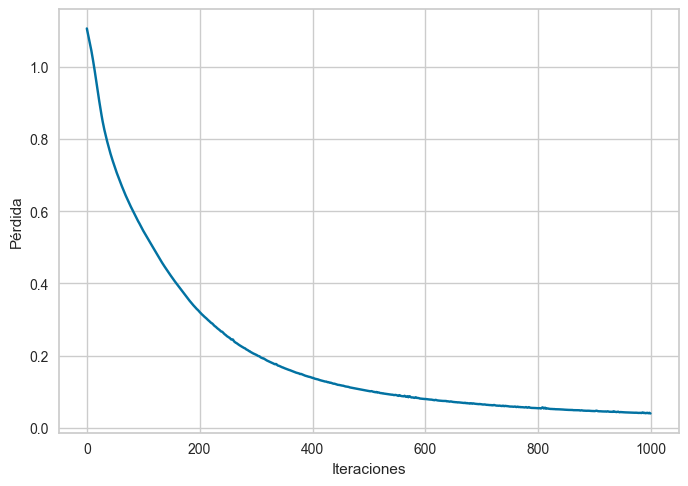

In [173]:
mlp_trained = pipeline_mlp.named_steps['modelo']
plt.plot(mlp_trained.loss_curve_)
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.show()

# Segundo modelo #

In [174]:
pipeline_mlp2 = Pipeline([
    ('preprocesador', preprocesador),  
    ('modelo', MLPClassifier(
        hidden_layer_sizes=(5, 3), 
        activation='tanh',         
        max_iter=1000,
        verbose=True
    ))
])

# Entrenamiento
pipeline_mlp2.fit(X_test, y_test)

# Predicciones
y_predtrain2 = pipeline_mlp2.predict(X_test)

Iteration 1, loss = 1.28345653
Iteration 2, loss = 1.26224493
Iteration 3, loss = 1.24273558
Iteration 4, loss = 1.22427127
Iteration 5, loss = 1.20660875
Iteration 6, loss = 1.18951985
Iteration 7, loss = 1.17315980
Iteration 8, loss = 1.15750283
Iteration 9, loss = 1.14256099
Iteration 10, loss = 1.12776552
Iteration 11, loss = 1.11417526
Iteration 12, loss = 1.10056184
Iteration 13, loss = 1.08751434
Iteration 14, loss = 1.07464216
Iteration 15, loss = 1.06241142
Iteration 16, loss = 1.05040033
Iteration 17, loss = 1.03900591
Iteration 18, loss = 1.02794253
Iteration 19, loss = 1.01718625
Iteration 20, loss = 1.00664678
Iteration 21, loss = 0.99623111
Iteration 22, loss = 0.98616656
Iteration 23, loss = 0.97640498
Iteration 24, loss = 0.96685106
Iteration 25, loss = 0.95747883
Iteration 26, loss = 0.94857703
Iteration 27, loss = 0.93989513
Iteration 28, loss = 0.93151871
Iteration 29, loss = 0.92343104
Iteration 30, loss = 0.91552719
Iteration 31, loss = 0.90798068
Iteration 32, los

C:\Users\ASUS TUF\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


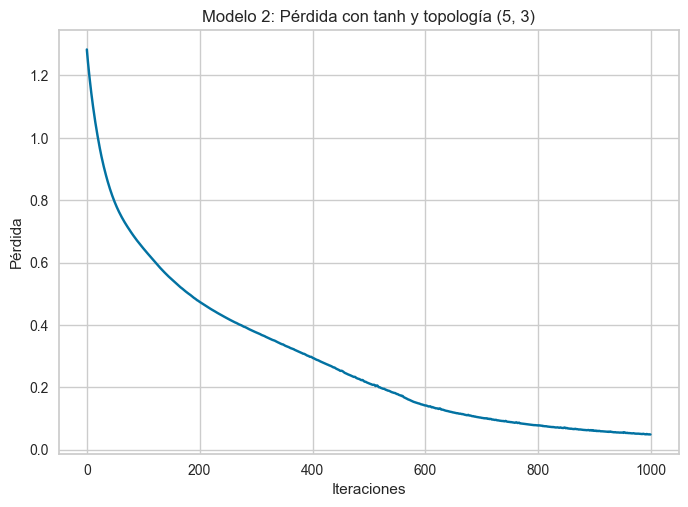

In [175]:
plt.plot(pipeline_mlp2.named_steps['modelo'].loss_curve_)
plt.title('Modelo 2: Pérdida con tanh y topología (5, 3)')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.show()

In [176]:
print("Accuracy Modelo 1:", accuracy_score(y_test, y_predtrain))
print("Accuracy Modelo 2:", accuracy_score(y_test, y_predtrain2))

Accuracy Modelo 1: 0.9954337899543378
Accuracy Modelo 2: 0.9954337899543378


# Modelos para conjunto de test #

In [177]:
# Ajusta el pipeline con X_train (¡no con X completo!)
pipeline.fit(X_train, y_train)

# Predice con X_test (el pipeline aplicará las transformaciones)
y_pred = pipeline.predict(X_test)

# Primer modelo # 


In [178]:
from sklearn.neural_network import MLPClassifier

pipeline_mlp = Pipeline([
    ('preprocesador', preprocesador),  
    ('modelo', MLPClassifier(
        hidden_layer_sizes=(3, 4),  
        max_iter=1000,              
        verbose=True                
    ))
])

pipeline_mlp.fit(X_train, y_train)

y_pred = pipeline_mlp.predict(X_test)

print("Predicciones:", y_pred[:10])

Iteration 1, loss = 1.21461553
Iteration 2, loss = 1.19915945
Iteration 3, loss = 1.18442561
Iteration 4, loss = 1.16977145
Iteration 5, loss = 1.15495091
Iteration 6, loss = 1.14063140
Iteration 7, loss = 1.12554382
Iteration 8, loss = 1.11065880
Iteration 9, loss = 1.09629315
Iteration 10, loss = 1.08124908
Iteration 11, loss = 1.06665846
Iteration 12, loss = 1.05221288
Iteration 13, loss = 1.03792362
Iteration 14, loss = 1.02422225
Iteration 15, loss = 1.01049563
Iteration 16, loss = 0.99717770
Iteration 17, loss = 0.98397339
Iteration 18, loss = 0.97076084
Iteration 19, loss = 0.95768744
Iteration 20, loss = 0.94517766
Iteration 21, loss = 0.93234296
Iteration 22, loss = 0.92064357
Iteration 23, loss = 0.90841753
Iteration 24, loss = 0.89623986
Iteration 25, loss = 0.88453115
Iteration 26, loss = 0.87265613
Iteration 27, loss = 0.86140518
Iteration 28, loss = 0.85052174
Iteration 29, loss = 0.83961427
Iteration 30, loss = 0.82881829
Iteration 31, loss = 0.81868264
Iteration 32, los

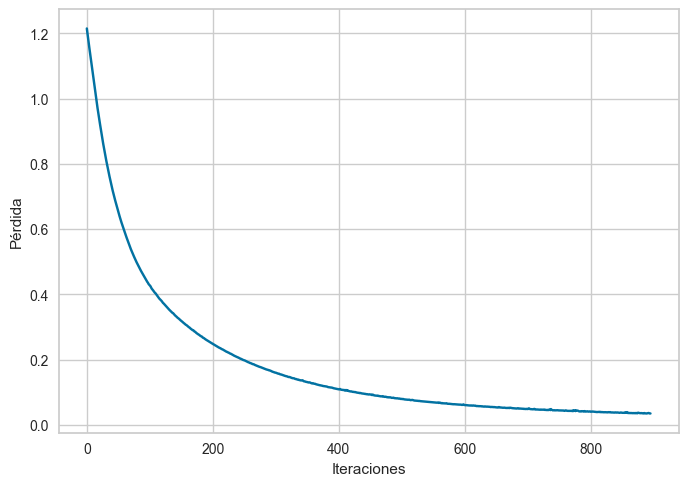

In [179]:
mlp_trained = pipeline_mlp.named_steps['modelo']
plt.plot(mlp_trained.loss_curve_)
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.show()

# Segundo Modelo #

In [180]:
pipeline_mlp2 = Pipeline([
    ('preprocesador', preprocesador),  
    ('modelo', MLPClassifier(
        hidden_layer_sizes=(5, 3), 
        activation='tanh',         
        max_iter=1000,
        verbose=True
    ))
])

# Entrenamiento
pipeline_mlp2.fit(X_train, y_train)

# Predicciones
y_pred2 = pipeline_mlp2.predict(X_test)



Iteration 1, loss = 1.32976963
Iteration 2, loss = 1.29304127
Iteration 3, loss = 1.25361707
Iteration 4, loss = 1.21315373
Iteration 5, loss = 1.17079330
Iteration 6, loss = 1.12659331
Iteration 7, loss = 1.08339372
Iteration 8, loss = 1.04335400
Iteration 9, loss = 1.00649837
Iteration 10, loss = 0.97804646
Iteration 11, loss = 0.95515228
Iteration 12, loss = 0.93638573
Iteration 13, loss = 0.92072619
Iteration 14, loss = 0.90747185
Iteration 15, loss = 0.89505894
Iteration 16, loss = 0.88416265
Iteration 17, loss = 0.87364965
Iteration 18, loss = 0.86452295
Iteration 19, loss = 0.85559341
Iteration 20, loss = 0.84692619
Iteration 21, loss = 0.83903332
Iteration 22, loss = 0.83154062
Iteration 23, loss = 0.82402242
Iteration 24, loss = 0.81742198
Iteration 25, loss = 0.81091404
Iteration 26, loss = 0.80494359
Iteration 27, loss = 0.79897528
Iteration 28, loss = 0.79331160
Iteration 29, loss = 0.78801297
Iteration 30, loss = 0.78293100
Iteration 31, loss = 0.77812276
Iteration 32, los

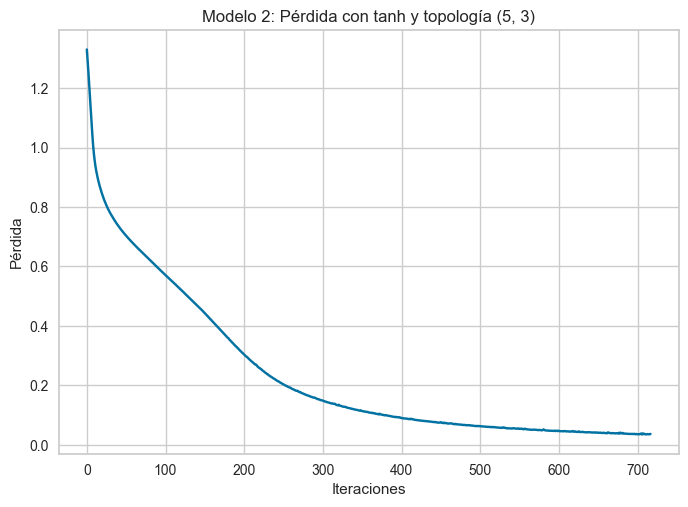

In [181]:
plt.plot(pipeline_mlp2.named_steps['modelo'].loss_curve_)
plt.title('Modelo 2: Pérdida con tanh y topología (5, 3)')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.show()

In [182]:
print("Accuracy Modelo 1:", accuracy_score(y_test, y_pred))
print("Accuracy Modelo 2:", accuracy_score(y_test, y_pred2))

Accuracy Modelo 1: 0.9748858447488584
Accuracy Modelo 2: 0.9611872146118722


La precision del modelo es similar tanto para el conjunto de train como el de test ademas que esta es bastante alta lo cual nos indica que el modelo predice muy bien nuestros, por lo tanto no se considera que el modelo sufra de overfitting o underfitting.

# Predecir el precio de las casas #


In [183]:
# Usar el primer modelo para predecir
y_pred_modelo1 = pipeline_mlp.predict(X_test)

# Usar el segundo modelo para predecir
y_pred_modelo2 = pipeline_mlp2.predict(X_test)

In [184]:
# Métricas para el Modelo 1
print("--- Modelo 1 ---")
print(classification_report(y_test, y_pred_modelo1))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_modelo1))

# Métricas para el Modelo 2
print("\n--- Modelo 2 ---")
print(classification_report(y_test, y_pred_modelo2))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_modelo2))

--- Modelo 1 ---
              precision    recall  f1-score   support

       Caras       0.99      0.97      0.98       150
  Economicas       0.97      0.99      0.98       134
 Intermedias       0.97      0.96      0.96       154

    accuracy                           0.97       438
   macro avg       0.97      0.98      0.98       438
weighted avg       0.97      0.97      0.97       438

Matriz de confusión:
 [[146   0   4]
 [  0 133   1]
 [  2   4 148]]

--- Modelo 2 ---
              precision    recall  f1-score   support

       Caras       0.97      0.97      0.97       150
  Economicas       0.98      0.96      0.97       134
 Intermedias       0.94      0.95      0.95       154

    accuracy                           0.96       438
   macro avg       0.96      0.96      0.96       438
weighted avg       0.96      0.96      0.96       438

Matriz de confusión:
 [[146   0   4]
 [  0 128   6]
 [  4   3 147]]


In [185]:
comparacion = pd.DataFrame({
    'Real': y_test,
    'Prediccion_Modelo1': y_pred_modelo1,
    'Prediccion_Modelo2': y_pred_modelo2
})

print(comparacion.head(10)) 

             Real Prediccion_Modelo1 Prediccion_Modelo2
492   Intermedias        Intermedias        Intermedias
65          Caras              Caras              Caras
889   Intermedias        Intermedias        Intermedias
1173        Caras              Caras              Caras
1206   Economicas         Economicas         Economicas
672   Intermedias        Intermedias        Intermedias
724         Caras              Caras              Caras
445    Economicas         Economicas         Economicas
97     Economicas         Economicas         Economicas
148   Intermedias         Economicas        Intermedias


Modelo 1 (Topología: (3,4), Activación: relu):
              precision    recall  f1-score   support

       Caras       0.99      0.97      0.98       150
  Economicas       0.97      0.99      0.98       134
 Intermedias       0.97      0.96      0.96       154

    accuracy                           0.97       438
   macro avg       0.97      0.98      0.98       438
weighted avg       0.97      0.97      0.97       438

Matriz de Confusión:


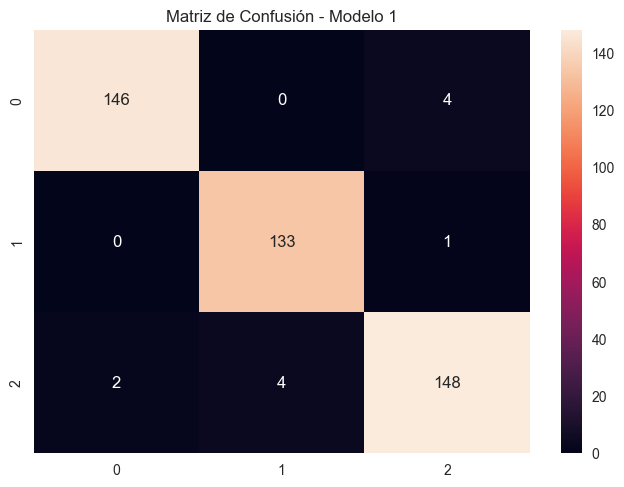


Modelo 2 (Topología: (5,3), Activación: tanh):
              precision    recall  f1-score   support

       Caras       0.97      0.97      0.97       150
  Economicas       0.98      0.96      0.97       134
 Intermedias       0.94      0.95      0.95       154

    accuracy                           0.96       438
   macro avg       0.96      0.96      0.96       438
weighted avg       0.96      0.96      0.96       438

Matriz de Confusión:


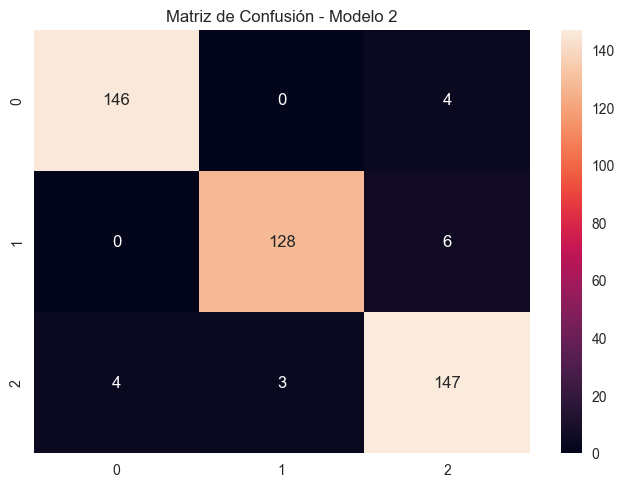

In [186]:
# Métricas para el Modelo 1
print("Modelo 1 (Topología: (3,4), Activación: relu):")
print(classification_report(y_test, y_pred_modelo1))
print("Matriz de Confusión:")
sns.heatmap(confusion_matrix(y_test, y_pred_modelo1), annot=True, fmt="d")
plt.title("Matriz de Confusión - Modelo 1")
plt.show()

# Métricas para el Modelo 2
print("\nModelo 2 (Topología: (5,3), Activación: tanh):")
print(classification_report(y_test, y_pred_modelo2))
print("Matriz de Confusión:")
sns.heatmap(confusion_matrix(y_test, y_pred_modelo2), annot=True, fmt="d")
plt.title("Matriz de Confusión - Modelo 2")
plt.show()

In [187]:
import time

# Tiempo de entrenamiento - Modelo 1
start_time = time.time()
pipeline_mlp.fit(X_train, y_train)
end_time = time.time()
print(f"Tiempo de entrenamiento (Modelo 1): {end_time - start_time:.2f} segundos")

# Tiempo de entrenamiento - Modelo 2
start_time = time.time()
pipeline_mlp2.fit(X_train, y_train)
end_time = time.time()
print(f"Tiempo de entrenamiento (Modelo 2): {end_time - start_time:.2f} segundos")

Iteration 1, loss = 1.59574451
Iteration 2, loss = 1.55826462
Iteration 3, loss = 1.52229093
Iteration 4, loss = 1.48512387
Iteration 5, loss = 1.44718055
Iteration 6, loss = 1.40890302
Iteration 7, loss = 1.37278274
Iteration 8, loss = 1.34194710
Iteration 9, loss = 1.31398439
Iteration 10, loss = 1.28904393
Iteration 11, loss = 1.26543400
Iteration 12, loss = 1.24293850
Iteration 13, loss = 1.22175398
Iteration 14, loss = 1.20213361
Iteration 15, loss = 1.18338882
Iteration 16, loss = 1.16432412
Iteration 17, loss = 1.14611665
Iteration 18, loss = 1.12877297
Iteration 19, loss = 1.11244092
Iteration 20, loss = 1.09654195
Iteration 21, loss = 1.08090585
Iteration 22, loss = 1.06495587
Iteration 23, loss = 1.04987486
Iteration 24, loss = 1.03479276
Iteration 25, loss = 1.02037641
Iteration 26, loss = 1.00607372
Iteration 27, loss = 0.99137773
Iteration 28, loss = 0.97660351
Iteration 29, loss = 0.96210332
Iteration 30, loss = 0.94779106
Iteration 31, loss = 0.93311234
Iteration 32, los

In [188]:
# Comparar errores en cada clase
errores_modelo1 = y_test != y_pred_modelo1
errores_modelo2 = y_test != y_pred_modelo2

print("Errores por categoría (Modelo 1):")
print(pd.crosstab(y_test, errores_modelo1, rownames=['Real'], colnames=['Error']))

print("\nErrores por categoría (Modelo 2):")
print(pd.crosstab(y_test, errores_modelo2, rownames=['Real'], colnames=['Error']))

Errores por categoría (Modelo 1):
Error        False  True 
Real                     
Caras          146      4
Economicas     133      1
Intermedias    148      6

Errores por categoría (Modelo 2):
Error        False  True 
Real                     
Caras          146      4
Economicas     128      6
Intermedias    147      7


In [189]:
# Identificar casos donde ambos modelos se equivocan
errores_combinados = (y_test != y_pred_modelo1) & (y_test != y_pred_modelo2)
print("\nCasos difíciles (ambos modelos fallan):")
print(X_test[errores_combinados])


Casos difíciles (ambos modelos fallan):
     ExterQual BsmtQual KitchenQual GarageFinish MasVnrType MSZoning Street  \
1210        Gd       Gd          Gd          RFn    BrkFace       RL   Pave   
597         Gd       Ex          Gd          Fin    BrkFace       RL   Pave   
446         Gd       TA          Gd          Fin    BrkFace       RL   Pave   
827         Gd       Gd          Gd          RFn    BrkFace       RL   Pave   
364         TA       Gd          TA          Fin    BrkFace       RL   Pave   
843         TA       TA          TA          Unf    BrkFace       RL   Pave   
331         TA       TA          TA          RFn    BrkFace       RL   Pave   

     Condition2 CentralAir  SalePrice  OverallQual  GrLivArea  GarageCars  
1210       Norm          Y   0.101729    -0.071836   0.627329    0.311725  
597        Norm          Y   0.167220     0.651479  -0.215998    1.650307  
446        Norm          Y   0.114321    -0.071836   0.709187    0.311725  
827        Norm       

# Tuneo del modelo #

In [222]:
param_grid = {
    "modelo__hidden_layer_sizes": [(50,), (100,)],
    "modelo__activation": ["relu", "tanh"],
    "modelo__alpha": [0.0001, 0.01],
    "modelo__learning_rate_init": [0.001, 0.01],
}

grid = GridSearchCV(pipeline_mlp, param_grid, cv=3, scoring="accuracy")
grid.fit(X, y)

print("Mejor modelo:", grid.best_params_)

Iteration 1, loss = 1.02569602
Iteration 2, loss = 0.94387801
Iteration 3, loss = 0.87709848
Iteration 4, loss = 0.81880837
Iteration 5, loss = 0.76715374
Iteration 6, loss = 0.72113833
Iteration 7, loss = 0.68102535
Iteration 8, loss = 0.64472018
Iteration 9, loss = 0.61190998
Iteration 10, loss = 0.58335590
Iteration 11, loss = 0.55839922
Iteration 12, loss = 0.53646264
Iteration 13, loss = 0.51751337
Iteration 14, loss = 0.50084938
Iteration 15, loss = 0.48717297
Iteration 16, loss = 0.47493378
Iteration 17, loss = 0.46382682
Iteration 18, loss = 0.45420113
Iteration 19, loss = 0.44585643
Iteration 20, loss = 0.43777425
Iteration 21, loss = 0.43073965
Iteration 22, loss = 0.42364280
Iteration 23, loss = 0.41732620
Iteration 24, loss = 0.41114810
Iteration 25, loss = 0.40540767
Iteration 26, loss = 0.40001433
Iteration 27, loss = 0.39476607
Iteration 28, loss = 0.38975236
Iteration 29, loss = 0.38542151
Iteration 30, loss = 0.38038269
Iteration 31, loss = 0.37596624
Iteration 32, los